# 实验：自回归AR模型的应用——有效市场假说

## 有效市场假说（EMH）

有效市场假说（Efficient Markets Hypothesis，简称EMH）是由尤金·法玛（Eugene Fama）于1970年深化并提出的。

“有效市场假说”包含以下几个要点：

第一， 在市场上的每个人都是理性的经济人，金融市场上每只股票所代表的各家公司都处于这些理性人的严格监视之下，他们每天都在进行基本分析，以公司未来的获利性来评价公司的股票价格，把未来价值折算成今天的现值，并谨慎地在风险与收益之间进行权衡取舍。

第二， 股票的价格反映了这些理性人的供求的平衡，想买的人正好等于想卖的人，即，认为股价被高估的人与认为股价被低估的人正好相等，假如有人发现这两者不等，即存在套利的可能性的话，他们立即会用买进或卖出股票的办法使股价迅速变动到能够使二者相等为止。

第三， 股票的价格也能充分反映该资产的所有可获得的信息，即"信息有效"，当信息变动时，股票的价格就一定会随之变动。一个利好消息或利空消息刚刚传出时，股票的价格就开始异动，当它已经路人皆知时，股票的价格也已经涨或跌到适当的价位了。

"有效市场假说"实际上意味着"天下没有免费的午餐"，世上没有唾手可得之物。在一个正常的有效率的市场上，每个人都别指望发意外之财，所以我们花时间去看路上是否有钱好拣是不明智的，我们费心去分析股票的价值也是无益的，它白费我们的心思。

当然，"有效市场假说"只是一种理论假说，实际上，并非每个人总是理性的，也并非在每一时点上都是信息有效的。"这种理论也许并不完全正确"，曼昆说，"但是，有效市场假说作为一种对世界的描述，比你认为的要好得多。"
摘自MBA百科

### 实验要求
1. 读取上证指数的日价格数据
2. 计算日收益率、周收益率和月度收益率
3. 测试日收益率、周收益率和月度收益率三个序列的平稳性
4. 应用AR模型在日收益率序列、周收益率序列和月收益率序列
5. 结合有效市场假说，解释以上得到的结论。

## 1. 读取数据

使用开源API工具，可以获取指定日期内的上证指数的价格数据。

In [21]:
import tushare
tushare.set_token(token='95a929d8f6e5e25cc92f81cdab9c6e809b5507664c01bf6b5e3c3645')
pro = tushare.pro_api()

In [26]:
raw_data = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20240418')
raw_data.index = raw_data['trade_date']

In [27]:
raw_data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
20240418,000001.SZ,20240418,10.58,11.03,10.56,10.80,10.62,0.18,1.6949,3165914.26,3427338.982
20240417,000001.SZ,20240417,10.26,10.63,10.21,10.62,10.28,0.34,3.3074,2232640.57,2337576.587
20240416,000001.SZ,20240416,10.28,10.39,10.22,10.28,10.29,-0.01,-0.0972,1478036.43,1523138.499
20240415,000001.SZ,20240415,10.07,10.32,10.06,10.29,10.06,0.23,2.2863,1453202.60,1486326.196
20240412,000001.SZ,20240412,10.22,10.27,10.04,10.06,10.25,-0.19,-1.8537,1305453.71,1322011.754
...,...,...,...,...,...,...,...,...,...,...,...
20180706,000001.SZ,20180706,8.61,8.78,8.45,8.66,8.60,0.06,0.7000,988282.69,852071.526
20180705,000001.SZ,20180705,8.62,8.73,8.55,8.60,8.61,-0.01,-0.1200,835768.77,722169.579
20180704,000001.SZ,20180704,8.63,8.75,8.61,8.61,8.67,-0.06,-0.6900,711153.37,617278.559


<Axes: xlabel='trade_date'>

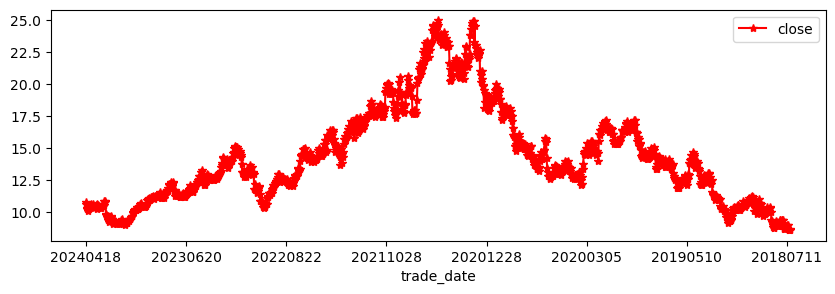

In [29]:
raw_data['close'].plot(figsize=(10,3), legend=True, color='red', marker='*')

## 2.日收益率序列

In [30]:
raw_data['close'].shift(1)

trade_date
20240418      NaN
20240417    10.80
20240416    10.62
20240415    10.28
20240412    10.29
            ...  
20180706     9.03
20180705     8.66
20180704     8.60
20180703     8.61
20180702     8.67
Name: close, Length: 1408, dtype: float64

In [70]:
import pandas as pd
data = pd.DataFrame()
data['close'] = raw_data['close']

In [71]:
# 日收益率
data['yesterday_close'] = raw_data['close'].shift(1)
data['daily_return'] = (data['close']-data['yesterday_close'])/data['yesterday_close']

In [72]:
# 周收益率
data['lastweek_close'] = raw_data['close'].shift(5)
data['week_return'] = (data['close']-data['lastweek_close'])/data['lastweek_close'] 

In [73]:
# 月收益率
data['lastmonth_close'] = raw_data['close'].shift(20)
data['month_return'] = (data['close']-data['lastmonth_close'])/data['lastmonth_close'] 

波动率

In [74]:
# 日波动率
data['daily_vol'] = data['daily_return'].rolling(20).std()

In [75]:
# 周波动率
data['week_vol'] = data['week_return'].rolling(20).std()

In [76]:
# 月波动率
data['month_vol'] = data['month_return'].rolling(20).std()

In [77]:
data=data.dropna()
data.head(10)

,close,yesterday_close,daily_return,lastweek_close,week_return,lastmonth_close,month_return,daily_vol,week_vol,month_vol
trade_date,,,,,,,,,,
20240221,10.80,10.90,-0.009174,10.49,0.029552,10.45,0.033493,0.014140,0.018188,0.023167
20240220,9.82,10.80,-0.090741,10.50,-0.064762,10.40,-0.055769,0.025068,0.023615,0.025289
20240219,9.81,9.82,-0.001018,10.53,-0.068376,10.54,-0.069260,0.024789,0.028478,0.030222
20240208,9.67,9.81,-0.014271,10.85,-0.108756,10.60,-0.087736,0.024811,0.036854,0.035466
20240207,9.61,9.67,-0.006205,10.90,-0.118349,10.23,-0.060606,0.023753,0.044458,0.037681
20240206,9.68,9.61,0.007284,10.80,-0.103704,10.33,-0.062924,0.023690,0.049010,0.038832
20240205,9.38,9.68,-0.030992,9.82,-0.044807,10.56,-0.111742,0.023698,0.048825,0.043588
20240202,9.27,9.38,-0.011727,9.81,-0.055046,10.47,-0.114613,0.023729,0.049372,0.047682
20240201,9.41,9.27,0.015102,9.67,-0.026887,10.38,-0.093449,0.024169,0.049386,0.049726


下面对收盘价和收益率进行绘图

<Axes: xlabel='trade_date'>

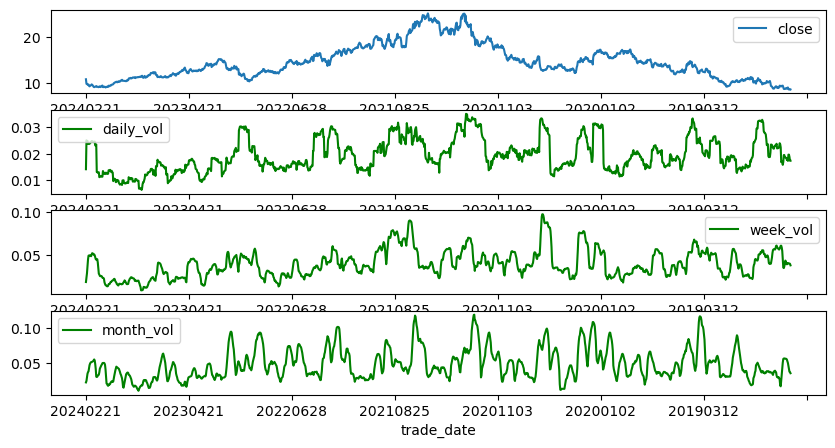

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,1)
data[['close']].plot(figsize=(10,5), ax=ax[0])
data[['daily_vol']].plot(figsize=(10,5), ax=ax[1], color='green')
data[['week_vol']].plot(figsize=(10,5), ax=ax[2], color='green')
data[['month_vol']].plot(figsize=(10,5), ax=ax[3], color='green')

## 3. 平稳性检验

结论：xxxxxxxxxxxxxxxx

## 4 AR模型

In [89]:
import statsmodels.tsa.ar_model as ar_model
model = ar_model.AutoReg(data['month_vol'], lags=4)
result = model.fit()
result.summary()

/Users/xhc/miniconda3/envs/d2l/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xhc/miniconda3/envs/d2l/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              month_vol   No. Observations:                 1369
Model:                     AutoReg(4)   Log Likelihood                6131.681
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Sun, 26 May 2024   AIC                         -12251.362
Time:                        11:43:36   BIC                         -12220.048
Sample:                             4   HQIC                        -12239.641
                                 1369                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0016      0.000      8.177      0.000       0.001       0.002
month_vol.L1     1.7561      0.027     64.873      0.000       1.703       1.809
month_vol.L2    -0.8318      0.055    -15.206      0.000      -0.939      -0.725
month_vol.L3     0.0485      0.055      0.887      0.375      -0.059       0.156
month_vol.L4    -0.0052      0.027     -0.191      0.849      -0.058       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1525           -0.1495j            1.1622           -0.0205
AR.2            1.1525           +0.1495j            1.1622            0.0205
AR.3            3.5470          -11.4414j           11.9786           -0.2022
AR.4            3.5470          +11.4414j           11.9786            0.2022
-----------------------------------------------------------------------------
"""

## 结论
市场弱有效